## Federal Courts Project Guide

The ultimate goal of this project is to build a centralized database of federal judgeships across the 13 district appellate courts and/or the 96 District courts in the United States. Because of the wealth of data involved, and the fact that much of this data is scattered across many pages and sites, the first step involves researching the domain, and developing a focus and range of data you want to obtain and make available.

Here are three possible angles:

1. Current judgeships, vacancies, and nomination proceedings: with this focus you would download tables of the recent vacancies and appointments, and go further into nomination procedures and Q&A's. This would entail a combination of scraping, conversions of PDFs, and using regular expressions to parse the PDFs (this is tough).

2. Historical judgeships: with this focus you examine changes in federal judgeships over a certain period of time (perhaps 10 to 20 years). This would entail mainly the scraping of many pages and the integration of data about specific judges, ordered by district.

3. Recent Nominations and confirmations:  this would focus specifically on judges newly nominated or appointed under the current administration. The focus would be more directly on the nomination hearings (Q&As), as well as the search for other data sources regarding the judges--news articles, opinions, writings by the judges.



Your primary goal by Thursday is to come up with a specific research question: what kind of knowledge do you want to investigate, build and make available through this project. What are the central units of analysis? What do you want to reveal about the federal courts?

Your secondary goal is to view the primary source pages and begin scraping. You do not have to have your central research question right at the beginning of the scraping, but it may help to have a direction.

You're goal by Friday is to have a finalized architecture for your dataframe(s), any finalized list of sources that you will scrape/obtain.

**Data Architecture**
The question of architecture is central to this project. Because of the many possible angles, and the highly decentralized state of the primary source data, there is a wide range of designs for tables, rows, columns. You may want to begin scraping some of the main pages to get more familiar with what kind of rows and columns might be involved.

**Interpretive architecture**
This depends I how focused your data frame will be. If you pick specific districts, judges and/or confirmation hearings you may want to do more human reading to assess different ways the framing the politics/legal perspective of the judge or the district's decisions. If you choose to cast a wider net for your data, then you will want to focus on more quantitative categories for framing this: judges age, district, background, length of appointment, length of vacancy, number of vacancies, etc.



### Coding considerations:
While there is a great amount of data available, much of it is distributed across multiple pages, sometimes and inconsistent format. If you're interested in scraping nominations and downloading PDFs, you may want to consider using **selenium** for part of it. If you want to use beautiful soup, you will have to download links, and the loop through multiple pages to get a complete data set--unless your focus is more specific.

### STEP 1
Scrape the first page of judicial vacancies:

http://www.uscourts.gov/judges-judgeships/judicial-vacancies/current-judicial-vacancies

In [358]:
###Import your scraping libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd


my_url = 'http://www.uscourts.gov/judges-judgeships/judicial-vacancies/current-judicial-vacancies'
raw_html = requests.get(my_url).content
soup_doc = BeautifulSoup(raw_html, "html.parser")
print(soup_doc.prettify())


<!DOCTYPE html>
<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->
<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" dir="ltr"><![endif]-->
<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" dir="ltr"><![endif]-->
<!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)]><!-->
<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#">
 <!--<![endif]-->
 <head>
  <!--[if IE]><![endif]-->
  <link href="//fonts.gstatic.com" rel="dns-prefetch"/>
  <link crossorigin="" href="//fonts.gstatic.com" rel="preconnect"/>
  <link href="//themes.googleusercontent.com" rel="dns-prefetch"/>
  <link crossorigin="" href="//themes.googleusercontent.com" rel="preconnect"/>
  <link href="//www.google-analytics.com" rel="dns-prefetch"/>
  <link href

In [359]:
###Write your scraping code here
rows = soup_doc.find("table").find_all('tr')
#each tr is a row
#from there each td is a cell
# for row in rows: 
#     cells = row.find_all('td')
#     for cell in cells: 
#         print(cell.get_text())
#     print('--------------')

vacancy_list = []
for row in rows[1:]: 
    vacancy_dict = {}
    cells = row.find_all('td')
    vacancy_dict['court'] = cells[0].get_text()
    vacancy_dict['incumbent'] = cells[1].get_text()
    vacancy_dict['vacancy_reason'] = cells[2].get_text()
    vacancy_dict['vacancy_date'] = cells[3].get_text()
    vacancy_dict['nominee'] = cells[4].get_text()
    vacancy_dict['nom_date'] = cells[5].get_text()
    vacancy_list.append(vacancy_dict)
vacancy_list
    


[{'court': '01 - MA',
  'incumbent': 'Young,William G.',
  'vacancy_reason': 'Senior',
  'vacancy_date': '07/01/2021',
  'nominee': '',
  'nom_date': ''},
 {'court': '01 - MA',
  'incumbent': "O'Toole Jr.,George A.",
  'vacancy_reason': 'Senior',
  'vacancy_date': '01/01/2018',
  'nominee': '',
  'nom_date': ''},
 {'court': '01 - NH',
  'incumbent': 'Barbadoro,Paul J.',
  'vacancy_reason': 'Senior',
  'vacancy_date': '03/01/2021',
  'nominee': 'Elliott,Samantha D.',
  'nom_date': '09/30/2021'},
 {'court': '01 - PR',
  'incumbent': 'Gelpi Jr.,Gustavo A.',
  'vacancy_reason': 'Elevated',
  'vacancy_date': '10/18/2021',
  'nominee': '',
  'nom_date': ''},
 {'court': '01 - PR',
  'incumbent': 'Cerezo,Carmen Consuelo',
  'vacancy_reason': 'Retired',
  'vacancy_date': '02/28/2021',
  'nominee': '',
  'nom_date': ''},
 {'court': '02 - NY-E',
  'incumbent': 'Position Open',
  'vacancy_reason': 'AO Director',
  'vacancy_date': '02/01/2021',
  'nominee': '',
  'nom_date': ''},
 {'court': '02 - N

In [360]:
df = pd.DataFrame(vacancy_list)
df.head()
#df.to_csv('current_court_vacancies.csv', index=False)

,court,incumbent,vacancy_reason,vacancy_date,nominee,nom_date
0,01 - MA,"Young,William G.",Senior,07/01/2021,,
1,01 - MA,"O'Toole Jr.,George A.",Senior,01/01/2018,,
2,01 - NH,"Barbadoro,Paul J.",Senior,03/01/2021,"Elliott,Samantha D.",09/30/2021
3,01 - PR,"Gelpi Jr.,Gustavo A.",Elevated,10/18/2021,,
4,01 - PR,"Cerezo,Carmen Consuelo",Retired,02/28/2021,,


In [361]:
#can now answer these q's with the df
#which districts and courts have the most vacancies
#the most recent appointees
#what vacancies have taken the longest to fill, etc
#more!

In [362]:
#which districts and courts have the most vacancies

df.vacancy_reason.value_counts()
df.groupby(by='court').count()
df.groupby(by='court').vacancy_reason.value_counts()

#which courts have the most vacancies
df.court.value_counts().sort_values(ascending=False).head()

09 - CA-S    7
09 - CA-C    6
CL           4
02 - NY-E    4
02 - NY-S    4
Name: court, dtype: int64

In [363]:
pd.to_datetime(df.vacancy_date, errors="coerce", format="%m/%d/%Y")
df['vacancy_date'] = pd.to_datetime(df.vacancy_date, errors="coerce", format="%m/%d/%Y")
#df.vacancy_date

In [364]:
#the most recent appointees
df.nom_date
pd.to_datetime(df.nom_date, errors="coerce", format="%m/%d/%Y")
df['nom_date'] = pd.to_datetime(df.nom_date, errors="coerce", format="%m/%d/%Y")
df.nom_date

# pd.to_datetime(df.permit_issued_date, errors="coerce", format="%Y-%m-%d")
# df.permit_issued_date = pd.to_datetime(df.permit_issued_date, errors="coerce", format="%Y-%m-%d")
# df.permit_issued_date

#df.groupby(by='nominee').nom_date.value_counts()
df.sort_values(by='nom_date', ascending=False).head(10)

#could also look into nominations by year or month/year to find ones since jan 2020 (Biden term start)

,court,incumbent,vacancy_reason,vacancy_date,nominee,nom_date
48,09 - CA-N,"Hamilton,Phyllis J.",Senior,2021-02-01,"Thompson,Trina L.",2021-11-03
15,03 - NJ,"Linares,Jose L.",Retired,2019-05-16,"Castner,Georgette",2021-11-03
58,09 - NV,"Jones,Robert Clive",Senior,2016-02-01,"Traum,Anne Rachel",2021-11-03
57,09 - NV,"Mahan,James C.",Senior,2018-06-29,"Silva,Cristina D.",2021-11-03
54,09 - CA-S,"Houston,John A.",Senior,2018-02-06,"Montenegro,Ruth Bermudez",2021-11-03
47,09 - CA-N,"Alsup,William Haskell",Senior,2021-01-21,"Corley,Jacqueline Scott",2021-11-03
74,CL,"Damich,Edward J.",Senior,2013-10-21,"Bonilla,Armando O.",2021-10-05
13,02 - NY-S,"Forrest,Katherine B.",Resigned,2018-09-11,"Ho,Dale E.",2021-09-30
71,11 - GA-N,"Totenberg,Amy",Senior,2021-04-03,"Geraghty,Sarah Elisabeth",2021-09-30
70,11 - GA-N,"Thrash Jr.,Thomas W.",Senior,2021-05-08,"Calvert,Victoria Marie",2021-09-30


In [365]:
#what vacancies have taken the longest to fill, etc

#so would need to do nom date - vacancy date (for how long it's taken to NOMINATE, not how long it's taken to confirm)
df['days_before_nom'] = df.nom_date - df.vacancy_date
# pd.date_range

# startdt=pd.to_datetime('2017-01-01')
# enddt = pd.to_datetime('2018-01-01')
# len(pd.date_range(start=startdt,end=enddt,freq='M'))

# startdt = df.nom_date
# enddt = df.vacancy_date

# pd.date_range(start=startdt, end=enddt, freq='M')
df.days_before_nom
df.head(20)

#NEXT STEP: need to look back at notes to see how to move NaT to just '' rather than zero's 

,court,incumbent,vacancy_reason,vacancy_date,nominee,nom_date,days_before_nom
0,01 - MA,"Young,William G.",Senior,2021-07-01,,NaT,NaT
1,01 - MA,"O'Toole Jr.,George A.",Senior,2018-01-01,,NaT,NaT
2,01 - NH,"Barbadoro,Paul J.",Senior,2021-03-01,"Elliott,Samantha D.",2021-09-30,213 days
3,01 - PR,"Gelpi Jr.,Gustavo A.",Elevated,2021-10-18,,NaT,NaT
4,01 - PR,"Cerezo,Carmen Consuelo",Retired,2021-02-28,,NaT,NaT
5,02 - NY-E,Position Open,AO Director,2021-02-01,,NaT,NaT
6,02 - NY-E,"Irizarry,Dora L.",Senior,2020-01-26,,NaT,NaT
7,02 - NY-E,"Bianco,Joseph F.",Elevated,2019-05-08,,NaT,NaT
8,02 - NY-E,"Cogan,Brian M.",Senior,2020-06-12,,NaT,NaT
9,02 - NY-N,"Sharpe,Gary L.",Senior,2016-01-01,,NaT,NaT


In [366]:
df = pd.DataFrame(vacancy_list)
df.head()
df.to_csv('current_court_vacancies.csv', index=False)



In [367]:
df['vacancy_date']= pd.to_datetime(df['vacancy_date'])

In [368]:
df[df.nominee == '']
#currently 78 vacancies without nominees 
df[df.nominee == ''].vacancy_date.min()
#the longest vacant seat w/o a nominee has been vacant since 03/06/2015
df[df.nominee == ''].groupby(by='vacancy_date').min().sort_index()

#maybe join this with a database that tells me which states have 1 dem and 1 repub, or 2 from each party? then isolate data based on that 

,court,incumbent,vacancy_reason,nominee,nom_date
vacancy_date,,,,,
2015-03-06,03 - NJ,"Hochberg,Faith S.",Retired,,
2016-01-01,02 - NY-N,"Sharpe,Gary L.",Senior,,
2017-10-08,09 - CA-C,"O'Connell,Beverly Reid",Deceased,,
2018-01-01,01 - MA,"O'Toole Jr.,George A.",Senior,,
2018-07-13,CL,"Braden,Susan G.",Senior,,
2018-08-31,03 - PA-E,"Stengel,Lawrence F.",Retired,,
2018-10-11,02 - NY-S,"Sullivan,Richard J.",Elevated,,
2018-10-31,09 - CA-S,"Anello,Michael M.",Senior,,
2018-11-04,09 - CA-C,"Real,Manuel L.",Senior,,


In [369]:
df.court.value_counts()

09 - CA-S    7
09 - CA-C    6
CL           4
02 - NY-E    4
02 - NY-S    4
03 - PA-E    4
06 - OH-N    3
09 - CA-N    3
01 - MA      2
11 - GA-N    2
11 - FL-S    2
09 - WA-W    2
09 - NV      2
09 - CA-E    2
IT           2
04 - VA-E    2
01 - PR      2
03 - NJ      2
06 - MI-E    2
09 - WA-E    1
02 - NY-N    1
11 - CCA     1
11 - AL-M    1
10 - OK-N    1
10 - NM      1
10 - CO      1
10 - CCA     1
03 - PA-M    1
06 - MI-W    1
07 - IL-N    1
09 - ID      1
04 - VA-W    1
05 - MS-N    1
05 - TX-W    1
08 - SD      1
01 - NH      1
08 - AR-W    1
07 - WI-E    1
07 - IN-N    1
08 - MN      1
Name: court, dtype: int64

In [370]:
len(vacancy_list)

78

### STEP 2
Scrape the first page of judicial confirmations:

http://www.uscourts.gov/judges-judgeships/judicial-vacancies/confirmation-listing


In [371]:
my_url = 'http://www.uscourts.gov/judges-judgeships/judicial-vacancies/confirmation-listing'
raw_html = requests.get(my_url).content
soup_doc = BeautifulSoup(raw_html, "html.parser")
print(soup_doc.prettify())

<!DOCTYPE html>
<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->
<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" dir="ltr"><![endif]-->
<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" dir="ltr"><![endif]-->
<!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)]><!-->
<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#">
 <!--<![endif]-->
 <head>
  <!--[if IE]><![endif]-->
  <link href="//fonts.gstatic.com" rel="dns-prefetch"/>
  <link crossorigin="" href="//fonts.gstatic.com" rel="preconnect"/>
  <link href="//themes.googleusercontent.com" rel="dns-prefetch"/>
  <link crossorigin="" href="//themes.googleusercontent.com" rel="preconnect"/>
  <link href="//www.google-analytics.com" rel="dns-prefetch"/>
  <link href

In [372]:
rows = soup_doc.find("table").find_all('tr')
confr_list = []
for row in rows[1:]: 
    confr_dict = {}
    cells = row.find_all('td')
    confr_dict['nominee'] = cells[0].get_text()
    confr_dict['nom_date'] = cells[1].get_text()
    confr_dict['confirmation_date'] = cells[2].get_text()
    confr_dict['court'] = cells[3].get_text()
    confr_dict['incumbent'] = cells[4].get_text()
    confr_dict['vacancy_reason'] = cells[5].get_text()
    confr_dict['vacancy_date'] = cells[6].get_text()
    confr_list.append(confr_dict)
confr_list
len(confr_list)

28

In [373]:
df = pd.DataFrame(confr_list)
df.head()
#df.to_csv('judges_confirmed_by_congress.csv', index=False)

,nominee,nom_date,confirmation_date,court,incumbent,vacancy_reason,vacancy_date
0,"Gelpi,Gustavo A.",05/12/2021,10/18/2021,01 - CCA,"Torruella,Juan R.",Deceased,10/26/2020
1,"Kelley,Angel",05/12/2021,09/14/2021,01 - MA,"Woodlock,Douglas P.",Senior,06/01/2015
2,"Lee,Eunice C.",05/12/2021,08/07/2021,02 - CCA,"Katzmann,Robert A.",Senior,01/21/2021
3,"Perez,Myrna",06/15/2021,10/25/2021,02 - CCA,"Chin,Denny",Senior,06/01/2021
4,"Robinson,Beth",08/05/2021,11/01/2021,02 - CCA,"Hall,Peter W.",Senior,03/04/2021


In [374]:
#can now answer these q's with the df
#who are the current judges
#how long have they been judges
#what is the background of the judges--their ages, education, etc

In [375]:
#who are the latest confirmed judges
df.nominee.value_counts()

Gelpi,Gustavo A.             1
Kelley,Angel                 1
Pan,Florence Y.              1
Cobb,Jia M.                  1
Jackson,Ketanji Brown        1
Strickland,Margaret Irene    1
Rodriguez,Regina M.          1
Rossman,Veronica S.          1
Lin,Tana                     1
King,Lauren J.               1
Estudillo,David G.           1
Jackson-Akiwumi,Candace      1
Nachmanoff,Michael S.        1
Giles,Patricia Tolliver      1
Griggsby,Lydia Kay           1
Boardman,Deborah L.          1
Heytens,Toby J.              1
Williams,Karen McGlashan     1
Quraishi,Zahid N.            1
O'Hearn,Christine P.         1
Neals,Julien Xavier          1
Williams,Omar Antonio        1
Nagala,Sarala Vidya          1
Merriam,Sarah A.L.           1
Robinson,Beth                1
Perez,Myrna                  1
Lee,Eunice C.                1
Cunningham,Tiffany P.        1
Name: nominee, dtype: int64

In [376]:
#how long have they been judges
pd.to_datetime(df.nom_date, errors="coerce", format="%m/%d/%Y")
df['nom_date'] = pd.to_datetime(df.nom_date, errors="coerce", format="%m/%d/%Y")

In [377]:
pd.to_datetime(df.confirmation_date, errors='coerce', format="%m/%d/%Y")
df['confirmation_date'] = pd.to_datetime(df.confirmation_date, errors='coerce', format="%m/%d/%Y")
#df.confirmation_date

In [378]:
pd.to_datetime(df.vacancy_date, errors="coerce", format="%m/%d/%Y")
df.vacancy_date = pd.to_datetime(df.vacancy_date, errors="coerce", format="%m/%d/%Y")
#df.vacancy_date

In [379]:
# all of these judges have been confirmed in 2021, so this shows how many judges were confirmed in each month in 2021
df.resample('M', on='confirmation_date').size()

confirmation_date
2021-06-30     7
2021-07-31     1
2021-08-31     1
2021-09-30     5
2021-10-31    12
2021-11-30     2
Freq: M, dtype: int64

In [380]:
#this is a more clear way to see it, but this also shows how many judges were confirmed in each month where confirmations took place in 2021
df.confirmation_date.dt.month.value_counts().sort_index()

6      7
7      1
8      1
9      5
10    12
11     2
Name: confirmation_date, dtype: int64

<AxesSubplot:>

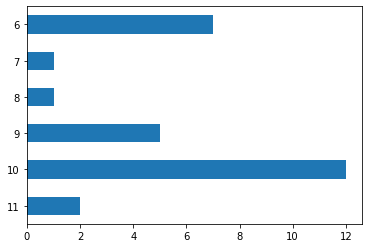

In [381]:
df.confirmation_date.dt.month.value_counts().sort_index(ascending=False).plot(kind='barh')
#what was going in October of this year that there were so many confirmations? 
#let's see who those judges were

In [382]:
df[df.confirmation_date.dt.month == 10]

,nominee,nom_date,confirmation_date,court,incumbent,vacancy_reason,vacancy_date
0,"Gelpi,Gustavo A.",2021-05-12,2021-10-18,01 - CCA,"Torruella,Juan R.",Deceased,2020-10-26
3,"Perez,Myrna",2021-06-15,2021-10-25,02 - CCA,"Chin,Denny",Senior,2021-06-01
5,"Merriam,Sarah A.L.",2021-06-15,2021-10-06,02 - CT,"Hall,Janet C.",Senior,2021-01-21
6,"Nagala,Sarala Vidya",2021-06-15,2021-10-27,02 - CT,"Bryant,Vanessa Lynne",Senior,2021-02-01
7,"Williams,Omar Antonio",2021-06-15,2021-10-28,02 - CT,"Thompson,Alvin W.",Senior,2018-08-31
9,"O'Hearn,Christine P.",2021-04-29,2021-10-19,03 - NJ,"Kugler,Robert B.",Senior,2018-11-02
11,"Williams,Karen McGlashan",2021-05-12,2021-10-26,03 - NJ,"Simandle,Jerome B.",Senior,2017-05-31
15,"Giles,Patricia Tolliver",2021-07-13,2021-10-26,04 - VAE,"O'Grady,Liam",Senior,2020-05-01
16,"Nachmanoff,Michael S.",2021-07-13,2021-10-27,04 - VAE,"Trenga,Anthony John",Senior,2021-06-01
19,"King,Lauren J.",2021-05-12,2021-10-05,09 - WAW,"Lasnik,Robert S.",Senior,2016-01-27


In [383]:
#time to confimration
(df.confirmation_date - df.nom_date).median()
df['days_to_confirmation'] = df.confirmation_date - df.nom_date


In [384]:
df['days_before_nom'] = df.nom_date - df.vacancy_date
df.days_before_nom.median()

Timedelta('149 days 12:00:00')

In [385]:
df.head()

,nominee,nom_date,confirmation_date,court,incumbent,vacancy_reason,vacancy_date,days_to_confirmation,days_before_nom
0,"Gelpi,Gustavo A.",2021-05-12,2021-10-18,01 - CCA,"Torruella,Juan R.",Deceased,2020-10-26,159 days,198 days
1,"Kelley,Angel",2021-05-12,2021-09-14,01 - MA,"Woodlock,Douglas P.",Senior,2015-06-01,125 days,2172 days
2,"Lee,Eunice C.",2021-05-12,2021-08-07,02 - CCA,"Katzmann,Robert A.",Senior,2021-01-21,87 days,111 days
3,"Perez,Myrna",2021-06-15,2021-10-25,02 - CCA,"Chin,Denny",Senior,2021-06-01,132 days,14 days
4,"Robinson,Beth",2021-08-05,2021-11-01,02 - CCA,"Hall,Peter W.",Senior,2021-03-04,88 days,154 days


In [386]:
df = pd.DataFrame(confr_list)
df.head()
df.to_csv('judges_confirmed_by_congress.csv', index=False)

### STEP 3
Investigate the judicial committee's confirmation postings:

https://www.judiciary.senate.gov/nominations/confirmed

This is relatively straightforward, except that the most interesting information is possibly PDFs of the questionnaires for each candidate. To get the PDFs you need to use selenium (see step 4), but first look this data and assess whether you think it will be useful to you. You can then parse them using regular expressions.

In [387]:
#Don't necessarily code here
#Think about where you're going first
#And read below

### STEP 4
Investigate the judicial committee's hearings on nominees: 

https://www.judiciary.senate.gov/hearings

This one is very tricky. It is where you can find PDFs with Q&A's from confirmation hearings. It is a multiple page scrape just to get links to various nomination pages, which then have links to PDFs, which is then have redirects to download the PDFs (you have to use selenium here). 

But before you do the scrape just go through the hearings pages by hand and click on where it says "Nominations". Look at the different Q&A's available and see if you think they will be useful to you. If they will be I can give you most of the code you will need to get the PDFs. Also, I have uploaded a file on slack of one hearings PDFs along with text conversions of them. Take a look at the text conversions, because you'll need to parse them using regular expressions.

If you are interested in more historical data, look into the information on these links:

Archives of vacancies/confirmations (if you want to build more historical data)
http://www.uscourts.gov/judges-judgeships/judicial-vacancies/archive-judicial-vacancies

Present and past judges including resumes:

Appeals courts:
https://www.fjc.gov/history/courts/u.s.-court-appeals-district-columbia-circuit-justices-and-judges

District courts:
https://www.fjc.gov/history/courts/u.s.-district-courts-and-federal-judiciary

In [388]:
#Think about your focus and what your ultimate architecture should be

In [464]:
#More to come...
import time
import requests

from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/jessieblaeser/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache
/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_17152/2739884916.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [465]:
#for every time it says "nominations" on this page:
    # I want a click [additional scrape to come] and a close of the new tab
    # then i want to click "next" for every page (81 pages) and do the same thing

my_url = 'https://www.judiciary.senate.gov/hearings'
raw_html = requests.get(my_url).content
soup_doc = BeautifulSoup(raw_html, "html.parser")
#print(soup_doc.prettify())


In [469]:
driver.get('https://www.judiciary.senate.gov/hearings')
#driver.find_elements(By.TAG_NAME, 'a')


In [470]:
# driver.close()
# driver.switch_to.window(driver.window_handles[0])

In [471]:
table = driver.find_element(By.TAG_NAME, 'table')
rows = table.find_elements(By.TAG_NAME, 'tr')

for row in rows: 
    try: 
        str_first_cell = row.find_element(By.TAG_NAME, 'a')
        if "Nominations" in str_first_cell.text:
            str_first_cell.click()
            table = driver.find_element(By.XPATH, '//*[@id="hearingcontent"]/section[2]/div[2]/div/ul')
            items = table.find_elements(By.TAG_NAME, 'li')
            for item in items: 
                if 'SJQ' in item.text:
                    item.find_element(By.TAG_NAME, 'a').click()
                    driver.switch_to.window(driver.window_handles[-1])
                        #This is where your next scraping work should go to get information from each fomr
                    driver.close()
                    driver.switch_to.window(driver.window_handles[0])
                   #print('this is an SJQ form')
                else: 
                    pass
                    #print('this is an SJQ form')
            #PAUSE HERE: now, go separately create the code that will get you each q/a form from this page
            # then bring it back in here to paste
            
            
            
#            row.back()??
#             print('i should be clicking here')
#             driver.switch_to.window(driver.window_handles[-1])
#             driver.close()
#             driver.switch_to.window(driver.window_handles[0])
#            print(str_first_cell.text)
#             print('it works!', inde
        else: 
            print('not what we want')
    except: 
        pass 
    
    #can't get click to work? 

not what we want


In [452]:
driver.get('https://www.judiciary.senate.gov/meetings/11/24/2021/nominations')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=96.0.4664.55)
Stacktrace:
0   chromedriver                        0x00000001026cc269 __gxx_personality_v0 + 582729
1   chromedriver                        0x0000000102657c33 __gxx_personality_v0 + 106003
2   chromedriver                        0x0000000102214cdf chromedriver + 171231
3   chromedriver                        0x00000001022037c2 chromedriver + 100290
4   chromedriver                        0x0000000102204155 chromedriver + 102741
5   chromedriver                        0x0000000102205f42 chromedriver + 110402
6   chromedriver                        0x00000001021fec22 chromedriver + 80930
7   chromedriver                        0x00000001022162b3 chromedriver + 176819
8   chromedriver                        0x0000000102279b0c chromedriver + 584460
9   chromedriver                        0x0000000102267c23 chromedriver + 511011
10  chromedriver                        0x000000010223d75e chromedriver + 337758
11  chromedriver                        0x000000010223ea95 chromedriver + 342677
12  chromedriver                        0x00000001026888ab __gxx_personality_v0 + 305803
13  chromedriver                        0x000000010269f863 __gxx_personality_v0 + 399939
14  chromedriver                        0x00000001026a4c7f __gxx_personality_v0 + 421471
15  chromedriver                        0x00000001026a0bba __gxx_personality_v0 + 404890
16  chromedriver                        0x000000010267ce51 __gxx_personality_v0 + 258097
17  chromedriver                        0x00000001026bc158 __gxx_personality_v0 + 516920
18  chromedriver                        0x00000001026bc2e1 __gxx_personality_v0 + 517313
19  chromedriver                        0x00000001026d36f8 __gxx_personality_v0 + 612568
20  libsystem_pthread.dylib             0x00007fff73324109 _pthread_start + 148
21  libsystem_pthread.dylib             0x00007fff7331fb8b thread_start + 15


In [441]:
table = driver.find_element(By.XPATH, '//*[@id="hearingcontent"]/section[2]/div[2]/div/ul')
#from here, each item is an <li> tag, and each href is inside an <a> tag
items = table.find_elements(By.TAG_NAME, 'li')
#items[0].text
#nice

for item in items: 
    if 'SJQ' in item.text:
        item.find_element(By.TAG_NAME, 'a').click()
        driver.switch_to.window(driver.window_handles[-1])
            #This is where your next scraping work should go to get information from each fomr
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
       #print('this is an SJQ form')
    else: 
        pass
        
#nice!!! 

In [334]:
#driver.close()

In [209]:

soup_doc.find('table')
# from here, each tr is a row, including headers
    # from there, each td is a cell 
    
rows = soup_doc.find('table').find_all('tr')
rows[5]

#looking for text of <a> class from each row

for index,row in enumerate(rows[:6]):
    try: 
        str_cell = row.find('a').get_text()
        if "Nominations" in str_cell: 
            driver.a.click()
            print('it works!', index)
        else: 
            print('not what we want')
    except: 
        pass 
    


not what we want
not what we want
not what we want


In [204]:
for row in rows: 
    try: 
        str_cells = row.find_all('a').get_text()
        print(str_cells[2])
#         for str in str_cells:
#             print(str.strip())
    except: 
        pass 
#str_cell.strip()